In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airbnb-open-data/AB_US_2020.csv


# improting required libraries for exploratory data analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("../input/us-airbnb-open-data/AB_US_2020.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [4]:
df.isna().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [6]:
df1=df.select_dtypes('float')

# finding inifite values in dataset

In [7]:
np.isinf(df1.stack()).groupby(level=1).sum()

latitude             0
longitude            0
reviews_per_month    0
dtype: int64

In [8]:
df1.isna().sum()

latitude                 0
longitude                0
reviews_per_month    48602
dtype: int64

# coverting float to int

In [9]:
df2=df.select_dtypes("int")
np.isinf(df2.stack()).groupby(level=1).sum()

availability_365                  0
calculated_host_listings_count    0
host_id                           0
id                                0
minimum_nights                    0
number_of_reviews                 0
price                             0
dtype: int64

In [10]:
df2.isna().sum()

id                                0
host_id                           0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
df.copy()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


# handling missing values 

In [12]:
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,124,30,10,01/03/20,0.09,5,261,Hawaii
48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii
48153,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,22/03/20,0.24,3,287,Hawaii
48154,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,10/08/20,1.03,1,116,Hawaii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212157,43531859,Chic Seattle Apartment near Greenlake,6601753,Isabel,Other neighborhoods,Roosevelt,47.68457,-122.31550,Entire home/apt,100,3,1,06/06/20,1.00,1,99,Seattle
212159,43554835,SL6 - Private¬∑Modern¬∑Quality¬∑Convenient¬∑N ...,287025852,Li,Lake City,Olympic Hills,47.73462,-122.29509,Private room,79,1,2,10/06/20,2.00,3,337,Seattle
212160,43554849,"SL4 - Modern,Private,Quality,Convenient,N Seattle",287025852,Li,Lake City,Olympic Hills,47.73357,-122.29651,Entire home/apt,79,1,1,13/06/20,1.00,3,351,Seattle
212161,43589616,Perfect spot for group events or family stays!,347974040,Marcus,Delridge,Highland Park,47.51284,-122.33587,Entire home/apt,200,1,2,14/06/20,2.00,1,330,Seattle


In [13]:
df.isna().sum().sum()

213110

In [14]:
df.isna().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [15]:
df=df.replace(np.nan,0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226030 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       226030 non-null  object 
 4   neighbourhood_group             226030 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

# exploratory data analysis

In [17]:
mean_price = df.groupby('city').agg({'price': 'mean'})
mean_price

,price
city,
Asheville,196.639344
Austin,269.290054
Boston,170.331836
Broward County,230.093295
Cambridge,163.072886
Chicago,153.020009
Clark County,213.756660
Columbus,321.718950
Denver,158.860714


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '0'),
  Text(1, 0, 'Hawaii'),
  Text(2, 0, 'Kauai'),
  Text(3, 0, 'Maui'),
  Text(4, 0, 'Honolulu'),
  Text(5, 0, 'Other Cities'),
  Text(6, 0, 'City of Los Angeles'),
  Text(7, 0, 'Unincorporated Areas'),
  Text(8, 0, 'Manhattan'),
  Text(9, 0, 'Brooklyn'),
  Text(10, 0, 'Queens'),
  Text(11, 0, 'Staten Island'),
  Text(12, 0, 'Bronx'),
  Text(13, 0, 'Providence'),
  Text(14, 0, 'Washington'),
  Text(15, 0, 'Newport'),
  Text(16, 0, 'Bristol'),
  Text(17, 0, 'Kent'),
  Text(18, 0, 'Central Area'),
  Text(19, 0, 'Other neighborhoods'),
  Text(20, 0, 'West Seattle'),
  Text(21, 0, 'Downtown'),
  Text(22, 0, 'Ballard'),
  Text(23, 0, 'Capitol Hill'),
  Text(24, 0, 'Beacon Hill'),
  Text(25, 0, 'Seward Park'),
  Text(26, 0, 'Queen Anne'),
  Text(27, 0, 'Rainier Valley'),
  Text(28, 0, 'Lake City'),
  Text(29, 0, 

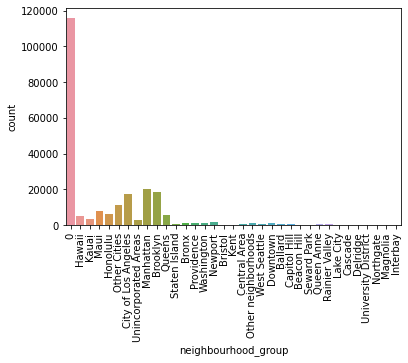

In [18]:
sns.countplot("neighbourhood_group",data=df)
plt.xticks(rotation=90)

In [19]:
df['neighbourhood'].describe()

count                   226030
unique                    1450
top       Unincorporated Areas
freq                      8020
Name: neighbourhood, dtype: object

In [20]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'] = pd.to_numeric(df['last_review'])
df['price'].corr(df['last_review']) 

-0.11784049652658017

In [21]:
df = df.drop(['id','name','host_id','host_name','latitude','longitude','last_review'],axis=1)

In [22]:
df.shape

(226030, 10)

# encoding labels into numeric values

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [24]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace(0,'null')
neighbourhood_group = pd.DataFrame({'Neighbourhood_group':df['neighbourhood_group'].unique()})
labelled = le.fit_transform(neighbourhood_group['Neighbourhood_group'])
neighbourhood_group['labelled'] = labelled
neighbourhood_group

,Neighbourhood_group,labelled
0,null,34
1,Hawaii,11
2,Kauai,14
3,Maui,19
4,Honolulu,12
5,Other Cities,22
6,City of Los Angeles,8
7,Unincorporated Areas,30
8,Manhattan,18
9,Brooklyn,4


In [25]:
df["neighbourhood_group"]=le.fit_transform(df["neighbourhood_group"])
df["neighbourhood"]=le.fit_transform(df["neighbourhood"])
df["room_type"]=le.fit_transform(df["room_type"])
df["city"]=le.fit_transform(df["city"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood_group             226030 non-null  int64  
 1   neighbourhood                   226030 non-null  int64  
 2   room_type                       226030 non-null  int64  
 3   price                           226030 non-null  int64  
 4   minimum_nights                  226030 non-null  int64  
 5   number_of_reviews               226030 non-null  int64  
 6   reviews_per_month               226030 non-null  float64
 7   calculated_host_listings_count  226030 non-null  int64  
 8   availability_365                226030 non-null  int64  
 9   city                            226030 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 17.2 MB


In [27]:
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['reviews_per_month'] = df['reviews_per_month'].astype(int)

# normalizing dataset

In [28]:
def normalise(feature):
    nmx = 100
    nmn = 0
    
    mx = feature.max()
    mn = feature.min()
    
    return ((nmx-nmn) / (mx-mn) * (feature-mx) + nmx)

df = normalise(df)


# split dataset

# train model 

In [29]:
x=df.drop(columns="price",axis=1)
y=df["price"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# linear regression model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1.25427958, 1.28614297, 1.2431421 , ..., 0.31674724, 1.29985635,
       1.46713233])

In [32]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,1.000040,1.254280
1,2.520101,1.286143
2,6.024241,1.243142
3,1.856074,1.280975
4,0.616025,1.001634
5,0.660026,1.218972
6,0.396016,0.487129
7,1.000040,1.025714
8,0.900036,1.345454
9,0.332013,1.374402


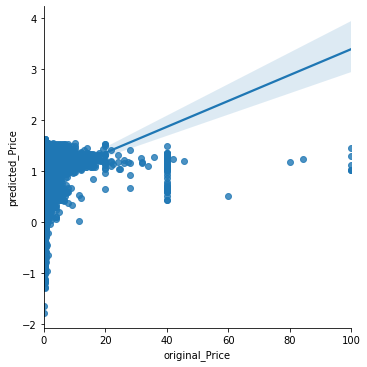

In [33]:
sns.lmplot(x="original_Price",y="predicted_Price",data=predictions)

In [34]:
model.score(x_test,y_test)

0.02527555207156118

In [35]:
error=y_pred-y_test
error

173894    0.254240
8690     -1.233958
26513    -4.781099
158260   -0.575100
168330    0.385609
            ...   
157793    0.194670
189655    1.066728
77276    -0.143271
165152    0.659831
209055    0.967112
Name: price, Length: 45206, dtype: float64

In [36]:
from sklearn import metrics
model.intercept_

0.9102454358089549

# Random forest regressor model

In [37]:
from sklearn.ensemble import RandomForestRegressor
Model=RandomForestRegressor(n_estimators=200)
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)


In [38]:
y_pred

array([1.80584557, 1.54035161, 5.86579463, ..., 0.33401336, 0.82545302,
       0.90959638])

In [39]:
predictions = pd.DataFrame({"original_Price": y_test.values, "predicted_Price": y_pred})
predictions.head(10)

,original_Price,predicted_Price
0,1.000040,1.805846
1,2.520101,1.540352
2,6.024241,5.865795
3,1.856074,1.226814
4,0.616025,0.648346
5,0.660026,1.247890
6,0.396016,0.439158
7,1.000040,0.308025
8,0.900036,1.503620
9,0.332013,1.822513


<AxesSubplot:xlabel='original_Price', ylabel='predicted_Price'>

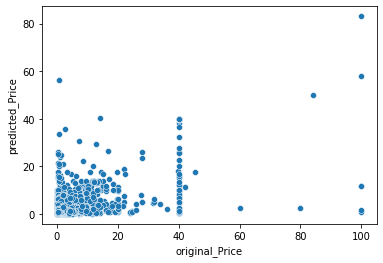

In [40]:
sns.scatterplot(x="original_Price",y="predicted_Price",data=predictions)